<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/Data_Check_for_Monthly_Rent_for_a_Single_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#한글 글꼴 추가

In [ ]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'cmr10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmmi10',
 'cmss10',
 'STIXGeneral',
 'DejaVu Serif',
 'cmex10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Serif Display',
 'cmb10',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'Humor Sans',
 'NanumGothicCoding',
 'Nanum Pen Script',
 'NanumBarunGothic',
 'NanumSquare',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'NanumBarunGothic',
 'Liberation Serif',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquareRound',
 'Liberation Sans Narrow',
 'NanumGothi

In [ ]:
# 나눔 고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanu

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=12).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
# 우선 fm._rebuild() 를 해주고, 런타임 재시작을 해준다.
fm._rebuild()

#Libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/실거래데이터/단독다가구/adjusted_주변_단독다가구(전월세)_실거래가_20191119_20201118.csv', encoding='CP949')
# 2020.05 강북권역 도심권 전월세전환율 
change_rate = 0.063

In [ ]:
# df = df.reindex(columns = df.columns.tolist() + ['보증금->월세'])

In [ ]:
df.head(10)

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명,위도,경도,학교까지_거리,혜화역까지_거리,한성대역까지_거리,보증금->월세
0,서울특별시 종로구 명륜1가,5*,8m미만,12.0,전세,202007,16,2500,0,NaN,혜화로3가길,37.586630,127.000469,651.412608,518.855787,524.566882,NaN
1,서울특별시 종로구 명륜1가,1*,8m미만,13.0,월세,202009,3,500,36,1994.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,NaN
2,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202008,1,2000,30,1995.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,NaN
3,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202005,10,300,30,1992.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,NaN
4,서울특별시 종로구 명륜1가,3*,8m미만,15.0,월세,202007,17,500,33,2001.0,성균관로10길,37.583790,126.998159,586.288566,401.985992,859.502810,NaN
5,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202006,27,1500,20,1991.0,성균관로,37.583224,126.998407,644.729558,357.503560,881.818849,NaN
6,서울특별시 종로구 명륜1가,7*,25m미만,15.0,월세,202001,28,500,50,1996.0,성균관로,37.583224,126.998407,644.729558,357.503560,881.818849,NaN
7,서울특별시 종로구 명륜1가,5*,8m미만,15.0,월세,202001,29,1000,55,2017.0,혜화로9길,37.586440,127.000173,628.099216,507.460078,556.774067,NaN
8,서울특별시 종로구 명륜1가,9*,12m미만,15.0,전세,202005,4,7000,0,1967.0,혜화로3길,37.586630,127.000469,651.412608,518.855787,524.566882,NaN
9,서울특별시 종로구 명륜1가,3*,8m미만,16.0,월세,202002,14,1000,50,1992.0,성균관로14길,37.584178,126.997784,533.152076,451.471420,861.984958,NaN


In [ ]:
for i in range(len(df)):
  df.loc[i, '보증금(만원)'] = int(df.loc[i, '보증금(만원)'].replace(',', ''))

In [ ]:
df.dtypes

시군구           object
번지            object
도로조건          object
계약면적(㎡)      float64
전월세구분         object
계약년월           int64
계약일            int64
보증금(만원)       object
월세(만원)         int64
건축년도         float64
도로명           object
위도           float64
경도           float64
학교까지_거리      float64
혜화역까지_거리     float64
한성대역까지_거리    float64
보증금->월세      float64
dtype: object

In [ ]:
for i in range(len(df)):
  df.loc[i, '보증금->월세'] = df.loc[i, '월세(만원)'] + int(df.loc[i, '보증금(만원)']) * change_rate / 12 

In [ ]:
len(df)

625

In [ ]:
df.head(10)

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명,위도,경도,학교까지_거리,혜화역까지_거리,한성대역까지_거리,보증금->월세
0,서울특별시 종로구 명륜1가,5*,8m미만,12.0,전세,202007,16,2500,0,NaN,혜화로3가길,37.586630,127.000469,651.412608,518.855787,524.566882,13.125
1,서울특별시 종로구 명륜1가,1*,8m미만,13.0,월세,202009,3,500,36,1994.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,38.625
2,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202008,1,2000,30,1995.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,40.500
3,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202005,10,300,30,1992.0,성균관로9길,37.584635,126.997017,448.798788,535.325224,894.486887,31.575
4,서울특별시 종로구 명륜1가,3*,8m미만,15.0,월세,202007,17,500,33,2001.0,성균관로10길,37.583790,126.998159,586.288566,401.985992,859.502810,35.625
5,서울특별시 종로구 명륜1가,1*,8m미만,15.0,월세,202006,27,1500,20,1991.0,성균관로,37.583224,126.998407,644.729558,357.503560,881.818849,27.875
6,서울특별시 종로구 명륜1가,7*,25m미만,15.0,월세,202001,28,500,50,1996.0,성균관로,37.583224,126.998407,644.729558,357.503560,881.818849,52.625
7,서울특별시 종로구 명륜1가,5*,8m미만,15.0,월세,202001,29,1000,55,2017.0,혜화로9길,37.586440,127.000173,628.099216,507.460078,556.774067,60.250
8,서울특별시 종로구 명륜1가,9*,12m미만,15.0,전세,202005,4,7000,0,1967.0,혜화로3길,37.586630,127.000469,651.412608,518.855787,524.566882,36.750
9,서울특별시 종로구 명륜1가,3*,8m미만,16.0,월세,202002,14,1000,50,1992.0,성균관로14길,37.584178,126.997784,533.152076,451.471420,861.984958,55.250


In [ ]:
df['보증금->월세'].describe()

count    625.000000
mean      67.397860
std       31.622536
min        5.250000
25%       46.750000
50%       61.250000
75%       78.750000
max      220.500000
Name: 보증금->월세, dtype: float64

In [ ]:
df['계약면적(㎡)'].describe()

count    625.000000
mean      32.792896
std       23.820278
min       10.610000
25%       18.000000
50%       23.860000
75%       40.600000
max      238.000000
Name: 계약면적(㎡), dtype: float64

In [ ]:
df['학교까지_거리'].describe()

count       557.000000
mean      25192.620895
std       61562.287933
min         282.588656
25%         535.293642
50%         644.729558
75%         972.067757
max      236129.593558
Name: 학교까지_거리, dtype: float64

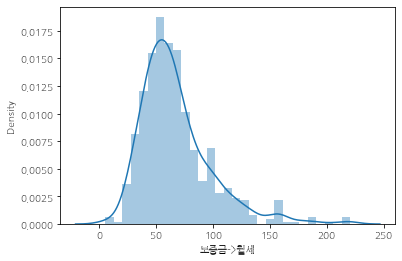

In [ ]:
sns.distplot(df['보증금->월세']);

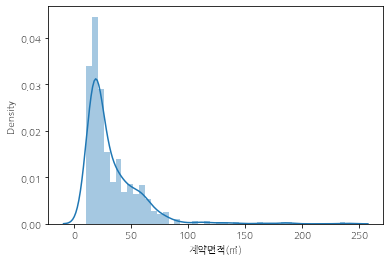

In [ ]:
sns.distplot(df['계약면적(㎡)']);

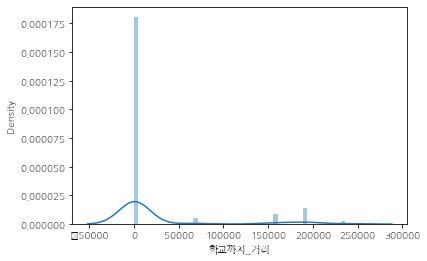

In [ ]:
sns.distplot(df['학교까지_거리']);

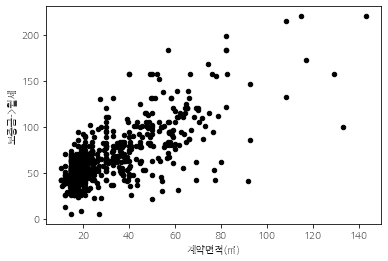

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '계약면적(㎡)'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

In [ ]:
#deleting points
df = df.drop(df[df['계약면적(㎡)'] > 150].index)

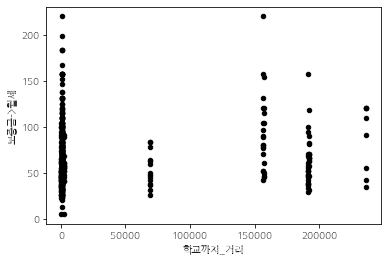

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '학교까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

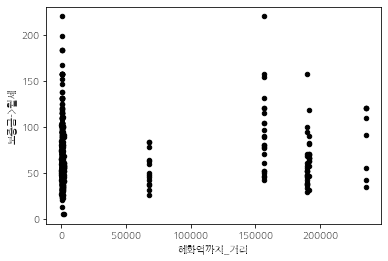

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '혜화역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

In [ ]:
#deleting points
df = df.drop(df[df['계약면적(㎡)'] > 150].index)

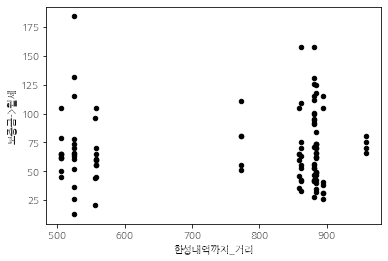

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '한성대역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

#to_csv

In [ ]:
df.to_csv('/content/gdrive/My Drive/recommend_system/tracer/preprocessed_명륜1가_단독다가구(전월세)_실거래가_20191119_20201118_ex.csv', index=False, encoding='cp949')